In [2]:
# Structred Data
import numpy as np
import pandas as pd
import torch

# System Libraries
import os
import librosa
import librosa.display
import soundfile as sf

# Garbage Collection
import gc

# Visualization
from IPython.display import Audio, display
import matplotlib.pyplot as plt

#### Set Paths

In [3]:
%cd ..
DIRECTORY_PATH = os.getcwd()

d:\ML\Real-Time-Speech-Recognition-and-Translation-


In [4]:
VALIDATED_DATA_PATH = r"\Common_Voice\validated.tsv"
VALIDATED_SENTENCES_PATH = r"\Common_Voice\unvalidated_sentences.tsv"
CLIP_DURATION_PATH = r"\Common_Voice\clip_durations.tsv"
CLIPS_PATH = r"\Common_Voice\clips\\"
CLIPS_WAV_PATH = r"\Common_Voice\clips_wav"

#### Read VALIDATED TSV files

In [5]:
cv_dataset_unfiltered = pd.read_csv(DIRECTORY_PATH + VALIDATED_DATA_PATH , sep='\t')[["path", "sentence", "up_votes"]]
display(cv_dataset_unfiltered.head())

,path,sentence,up_votes
0,common_voice_en_40353084.mp3,She hides her grief and joins in the homecomin...,2
1,common_voice_en_40632268.mp3,Proksch stayed at the palace of his personal f...,4
2,common_voice_en_40613175.mp3,She had an uneventful career.,3
3,common_voice_en_40434934.mp3,Let's eat the chocolate tonight.,2
4,common_voice_en_40401859.mp3,Newport was a county borough.,2


In [6]:
valid_clips_duration = pd.read_csv(DIRECTORY_PATH + CLIP_DURATION_PATH , sep='\t').join(other = cv_dataset_unfiltered, lsuffix="clip", rsuffix="path", how="inner").drop(columns=["clip"])
# Correct Duration of Audios
for i,path in enumerate(valid_clips_duration["path"]):
    path = DIRECTORY_PATH + CLIPS_PATH + path
    audio, sr = librosa.load(path, sr=None)
    valid_clips_duration.at[i , "duration[ms]"] = librosa.get_duration(y=audio, sr=sr)*1000

#Get Longest Audio Clip
MAX_AUDIO_DURATION = max(valid_clips_duration["duration[ms]"])
LongestAudio = valid_clips_duration[valid_clips_duration['duration[ms]'] == MAX_AUDIO_DURATION]
PATH_OF_LONGEST_AUDIO = DIRECTORY_PATH + CLIPS_PATH + LongestAudio["path"].values[0]
SENTENCE_OF_LONGEST_AUDIO = LongestAudio["sentence"].values[0]

# Load Audio
wavform, sample_rate = librosa.load(PATH_OF_LONGEST_AUDIO)
FRAME_LENGTH_OF_LONGEST_AUDIO = len(wavform)

#print information of Longest Audio
display(valid_clips_duration.head())
print(f"Longest Audio Duration: {MAX_AUDIO_DURATION}ms")
print(f"Path of Longest Audio: {PATH_OF_LONGEST_AUDIO}")
print(f"Sentence of Audio Clips: {SENTENCE_OF_LONGEST_AUDIO}")
print(f"Frame Length of Longest Audio: {FRAME_LENGTH_OF_LONGEST_AUDIO}")

,duration[ms],path,sentence,up_votes
0,2880.0,common_voice_en_40353084.mp3,She hides her grief and joins in the homecomin...,2
1,9252.0,common_voice_en_40632268.mp3,Proksch stayed at the palace of his personal f...,4
2,3960.0,common_voice_en_40613175.mp3,She had an uneventful career.,3
3,3708.0,common_voice_en_40434934.mp3,Let's eat the chocolate tonight.,2
4,3600.0,common_voice_en_40401859.mp3,Newport was a county borough.,2


Longest Audio Duration: 10656.0ms
Path of Longest Audio: d:\ML\Real-Time-Speech-Recognition-and-Translation-\Common_Voice\clips\\common_voice_en_40191947.mp3
Sentence of Audio Clips: The Allen area was previously home to the Caddo, Comanche, and other indigenous peoples.
Frame Length of Longest Audio: 234965


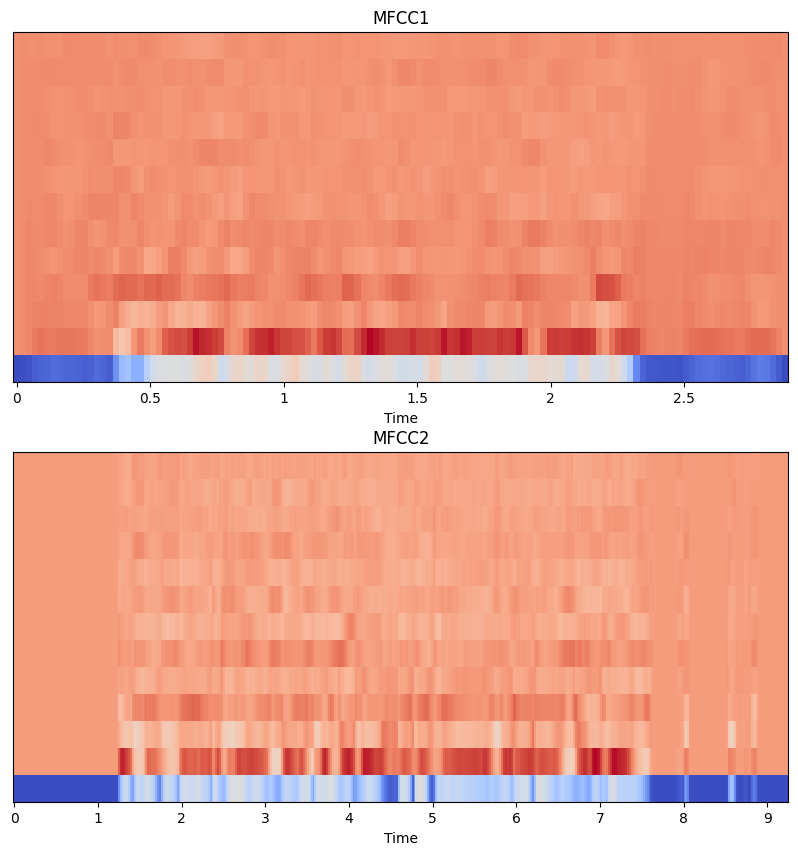

In [25]:
wav1 , sr = librosa.load(DIRECTORY_PATH + CLIPS_PATH + valid_clips_duration["path"].values[0])
mfccs1 = librosa.feature.mfcc(y=wav1, n_mfcc=13, sr=sr, n_fft=2048, hop_length=512)
wav2 , sr = librosa.load(DIRECTORY_PATH + CLIPS_PATH + valid_clips_duration["path"].values[1])
mfccs2 = librosa.feature.mfcc(y=wav2, n_mfcc=13, sr=sr, n_fft=2048, hop_length=512)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
librosa.display.specshow(mfccs1, x_axis='time', ax=ax[0])
ax[0].set(title='MFCC1')
librosa.display.specshow(mfccs2, x_axis='time', ax=ax[1])
ax[1].set(title='MFCC2')
plt.show()

In [72]:
# Add Padding
MAXPADDING = FRAME_LENGTH_OF_LONGEST_AUDIO
for path in valid_clips_duration["path"].tolist():
    wavform, sr = librosa.load(DIRECTORY_PATH + CLIPS_PATH + path)
    padding = [0] * (MAXPADDING - len(wavform))
    wavform = np.concatenate((wavform, padding))
    sf.write(DIRECTORY_PATH + CLIPS_WAV_PATH + "\\" + path[:-4] + ".wav", wavform, sr, format='wav')


here
